In [85]:
import networkx as nx
import nxpd
import string
import math


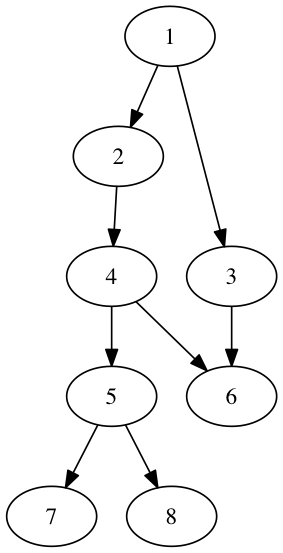

In [47]:
G = nx.DiGraph()
G.graph['dpi'] = 120
G.add_nodes_from(range(1,9))
G.add_edges_from([(1,2),(1,3),(2,4),(3,6),(4,5),(4,6),(5,7),(5,8)])
nxpd.draw(G, show='ipynb')

In [48]:
list(string.ascii_lowercase)[:13] + ['r']

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'r']

In [49]:
type(string.ascii_lowercase) is str

True

In [50]:
def add_edges_path(graph1, vertices_path):
    if vertices_path is str:
        vertices_path = list(vertices_path)
    for ix in range(len(vertices_path)-1):
        graph1.add_edge(vertices_path[ix],vertices_path[ix+1])

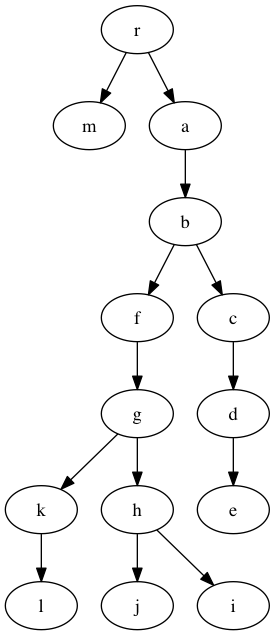

In [51]:
G1 = nx.DiGraph()
G.graph['dpi'] = 60
G1.add_nodes_from(list(string.ascii_lowercase)[:13] + ['r'])
add_edges_path(G1,'rm')
add_edges_path(G1,'bfgkl')
add_edges_path(G1,'r'+ string.ascii_lowercase[:5])
add_edges_path(G1,'ghi')
add_edges_path(G1,'hj')
nxpd.draw(G1, show='ipynb')

In [52]:
G1.adj

{'a': {'b': {}},
 'b': {'c': {}, 'f': {}},
 'c': {'d': {}},
 'd': {'e': {}},
 'e': {},
 'f': {'g': {}},
 'g': {'h': {}, 'k': {}},
 'h': {'i': {}, 'j': {}},
 'i': {},
 'j': {},
 'k': {'l': {}},
 'l': {},
 'm': {},
 'r': {'a': {}, 'm': {}}}

In [53]:
def tee_at(g1, node):
    g2 = nx.DiGraph()
    list_nodes = [node]
    while(len(list_nodes)>0):
        node_current = list_nodes.pop()
        if not g2.has_node(node_current):
            g2.add_node(node_current)
        for neighbor in g1.adj[node_current].keys():
            g2.add_edge(node_current, neighbor)
            list_nodes.append(neighbor)
    return g2

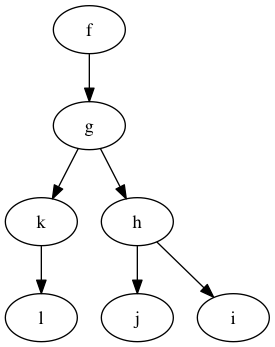

In [54]:
g2_at_f = tee_at(G1, 'f')
nxpd.draw(g2_at_f, show='ipynb')

In [55]:
def find_path(g2, node1, node2):
    if node1==node2:
        return [node1]
    
    for child in g2.adj[node1].keys():
        result = find_path(g2, child, node2)
        if len(result)>0:
            return [node1] + result
    return []
        
print(find_path(g2_at_f, 'f','i'))
    

['f', 'g', 'h', 'i']


In [56]:
def path_to_edges(path1):
    return [ (path1[ix],path1[ix+1]) for ix in range(len(path1)-1)]
path1 = path_to_edges(find_path(g2_at_f, 'f', 'i'))
print(path1)
for (a,b) in path1:
    print(a,b)

[('f', 'g'), ('g', 'h'), ('h', 'i')]
f g
g h
h i


In [57]:
def make_parent(g1, node_parent, node_child):
    # remove the child -> parent link if present
    if node_parent in g1[node_child]:
        g1.remove_edge(node_child, node_parent)
        
    # link node_child's parents to node_parent
    print(g1.predecessors(node_child))
    for predecessor in g1.predecessors(node_child):
        print(predecessor)
        g1.remove_edge(predecessor, node_child)
        g1.add_edge(predecessor, node_parent)
        
    # make parent -> child link
    g1.add_edge(node_parent, node_child)
        
g_make_parent = nx.DiGraph()
g_make_parent.add_edge('a','b')
g_make_parent.add_edge('b','c')
print(g_make_parent.adj)
print(g_make_parent.predecessors('c'))
make_parent(g_make_parent, 'c', 'b')
print(g_make_parent.adj)

{'b': {'c': {}}, 'c': {}, 'a': {'b': {}}}
['b']
['a']
a
{'b': {}, 'c': {'b': {}}, 'a': {'c': {}}}


In [58]:
g_make_parent

In [59]:
def reroot(g1, r0, r_prime):
    path1 = find_path(g1, r0, r_prime)
    for (a,b) in path_to_edges(path1):
        make_parent(g1, b, a)
        # for each child c of b
        for c in g1.adj[b]:
            # c is in path(r0, r')
            if c in path1:
                continue
            result1 = query(g1, c, r0, b)
            if result1 is None:
                continue
            (u, v) = result1
            reroot(g1, c, v)
            make_parent(u, v)
            
            
        

Making the data structure
===============================

emulate figure 5

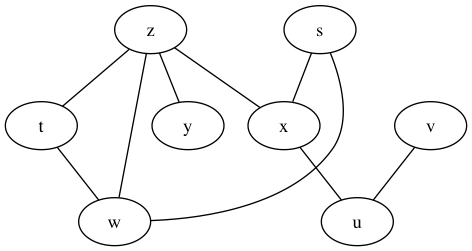

In [71]:
g2 = nx.Graph()
add_edges_path(g2, 'xzws')
add_edges_path(g2, 'xuv')
add_edges_path(g2, 'zy')
add_edges_path(g2, 'wt')
add_edges_path(g2, 'xs')
add_edges_path(g2, 'zt')
g2_dfs = nx.depth_first_search.dfs_tree(g2,source='x')
nxpd.draw(g2, show='ipynb')

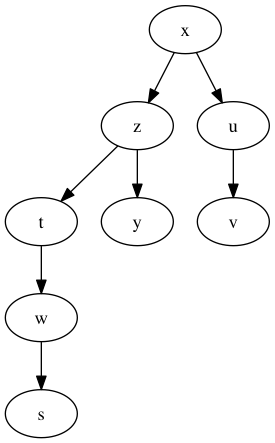

In [61]:
l_layouts = ['neato','dot','twopi','circo','fdp','nop', 'wc','acyclic','gvpr',
            'gvcolor','ccomps','sccmap','tred']
nxpd.draw(g2_dfs, show='ipynb')

In [62]:
g2_dfs.__dict__

{'adj': {'s': {},
  't': {'w': {}},
  'u': {'v': {}},
  'v': {},
  'w': {'s': {}},
  'x': {'u': {}, 'z': {}},
  'y': {},
  'z': {'t': {}, 'y': {}}},
 'adjlist_dict_factory': dict,
 'edge': {'s': {},
  't': {'w': {}},
  'u': {'v': {}},
  'v': {},
  'w': {'s': {}},
  'x': {'u': {}, 'z': {}},
  'y': {},
  'z': {'t': {}, 'y': {}}},
 'edge_attr_dict_factory': dict,
 'graph': {},
 'node': {'s': {},
  't': {},
  'u': {},
  'v': {},
  'w': {},
  'x': {},
  'y': {},
  'z': {}},
 'node_dict_factory': dict,
 'pred': {'s': {'w': {}},
  't': {'z': {}},
  'u': {'x': {}},
  'v': {'u': {}},
  'w': {'t': {}},
  'x': {},
  'y': {'z': {}},
  'z': {'x': {}}},
 'succ': {'s': {},
  't': {'w': {}},
  'u': {'v': {}},
  'v': {},
  'w': {'s': {}},
  'x': {'u': {}, 'z': {}},
  'y': {},
  'z': {'t': {}, 'y': {}}}}

Heavy-light decomposition
--------------------------

step 0: find the size of each node in the dfs

In [63]:
def find_root_dfs(g_dfs):
   return [child for (child,parent) in g_dfs.pred.items() if not parent][0]

def subtree_sizes(g_dfs, root_dfs=None):
    if root_dfs is None:
        root_dfs = find_root_dfs(g_dfs)
    dict_1 = {root_dfs: 1}
    for child in g_dfs.adj[root_dfs].keys():
        dict_child = subtree_sizes(g_dfs, child)
        if not dict_child:
            continue
        dict_1[root_dfs] += dict_child[child]
        dict_1.update(dict_child)
    return dict_1

subtree_sizes(g2_dfs)

{'s': 1, 't': 3, 'u': 2, 'v': 1, 'w': 2, 'x': 8, 'y': 1, 'z': 5}

step 1: form the preorder traversal list

In [64]:
def preorder_heavy_light(g_dfs, root_dfs=None, g_dfs_sizes=None):
    if root_dfs is None:
        root_dfs = find_root_dfs(g_dfs)
    if g_dfs_sizes is None:
        g_dfs_sizes = subtree_sizes(g_dfs, root_dfs)
    list1 = [root_dfs]
    children = list(g_dfs.adj[root_dfs].keys())
    children.sort(key=lambda x: -g_dfs_sizes[x])
    for child in children:
        list1 += preorder_heavy_light(g_dfs, child, g_dfs_sizes)
    return list1
    
preorder_heavy_light(g2_dfs)

['x', 'z', 't', 'w', 's', 'y', 'u', 'v']

step 2: form the segment tree

In [90]:
a = list(range(5))
a.reverse()
print(a)
print(a[::2])
print(a[1::2])

[4, 3, 2, 1, 0]
[4, 2, 0]
[3, 1]


In [66]:
class st_node:
    def __init__(self, name=None):
        self.name = name

In [91]:
# currently 2
def groups_of(list1, n):
    even_list, odd_list = list1[0::2], list1[1::2]
    if len(odd_list)!=len(even_list):
        odd_list.append(None)
    return [[even_list[ix], odd_list[ix]] for ix in range(len(even_list))]


In [121]:
class seg_tree:
    def __init__(self, g2, root_dfs):
        self.graph = g2
        self.root_dfs = root_dfs
        self.main()
        
    def make_dfs(self):
        make_dfs = nx.depth_first_search.dfs_tree
        self.dfs = make_dfs(self.graph, source=self.root_dfs)
        self.dfs_sz = subtree_sizes(self.dfs, self.root_dfs)
    
    def make_list_heavy_light(self):
        self.hl_list = preorder_heavy_light(self.dfs,
                                           self.root_dfs,
                                           self.dfs_sz)
    
    def make_st_leaves(self):
        # make leaves
        st = nx.DiGraph()
        for node_name in self.hl_list:
            st.add_node(node_name, st_node=st_node(node_name))
        self.segment_tree = st
    
    def st_layerize(self, nodes):
        node_pairs = groups_of(nodes, 2)
        return [self.st_add_parent(node_pair) for node_pair in node_pairs]
    def st_add_parent(self, node_pair):
        str_name = self.conc_name(node_pair)
        self.segment_tree.add_node(str_name, st_node=st_node(str_name))
        [self.st_add_edge(str_name, child) for child in node_pair]
        return str_name
    def st_add_edge(self, parent, child):
        if child is None:
            return 
        self.segment_tree.add_edge(parent, child)
    def conc_name(self, node_pair):
        str_name =  node_pair[0]
        str_name += node_pair[1] if node_pair[1] else ''
        return str_name
    
    def make_st(self):
        self.make_st_leaves()
        nodes = self.segment_tree.nodes()
        while(len(nodes)>1):
            nodes = self.st_layerize(nodes)
    
    def main(self):
        self.make_dfs()
        self.make_list_heavy_light()
        self.make_st()
        
    def draw_dfs(self):
        nxpd.draw(self.dfs, show='ipynb')
        


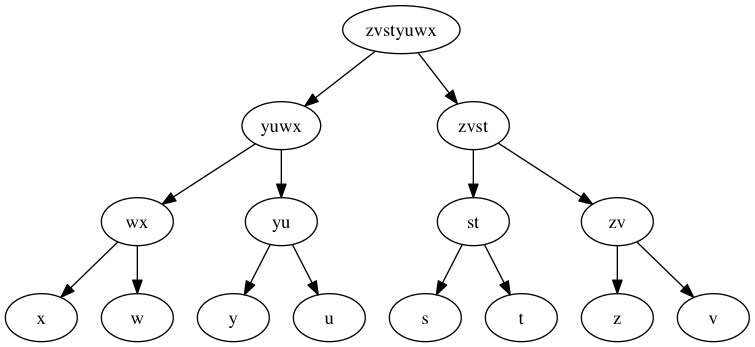

In [122]:
t2b = seg_tree(g2, 'x')
#t2b.draw_dfs()
t2b.segment_tree.node
nxpd.draw(t2b.segment_tree, show='ipynb')


In [94]:
g2_dfs.nodes()

['z', 'v', 's', 't', 'y', 'u', 'w', 'x']

In [74]:
help(g2_dfs.add_node)

Help on method add_node in module networkx.classes.digraph:

add_node(n, attr_dict=None, **attr) method of networkx.classes.digraph.DiGraph instance
    Add a single node n and update node attributes.
    
    Parameters
    ----------
    n : node
        A node can be any hashable Python object except None.
    attr_dict : dictionary, optional (default= no attributes)
        Dictionary of node attributes.  Key/value pairs will
        update existing data associated with the node.
    attr : keyword arguments, optional
        Set or change attributes using key=value.
    
    See Also
    --------
    add_nodes_from
    
    Examples
    --------
    >>> G = nx.Graph()   # or DiGraph, MultiGraph, MultiDiGraph, etc
    >>> G.add_node(1)
    >>> G.add_node('Hello')
    >>> K3 = nx.Graph([(0,1),(1,2),(2,0)])
    >>> G.add_node(K3)
    >>> G.number_of_nodes()
    3
    
    Use keywords set/change node attributes:
    
    >>> G.add_node(1,size=10)
    >>> G.add_node(3,weight=0.4,UTM=(

In [24]:
a=[1,2,3]
a.sort(f)

NameError: name 'f' is not defined

In [25]:
b_hash = {'a': 1, 'b': 2, 'c': 3}
[a for a in b_hash]
list(b_hash.keys())

['b', 'c', 'a']

In [26]:
b_hash = {'a': 1, 'b': 2, 'c': 3}
print(b_hash)
key_to_remove = 'e'
if key_to_remove in b_hash:
    b_hash.pop(key_to_remove)
print(b_hash)

{'b': 2, 'c': 3, 'a': 1}
{'b': 2, 'c': 3, 'a': 1}


In [27]:
len(G1.adj['i'].keys())

0

In [28]:
a=[1,2,3]
print(a)
a.pop()
print(a)
a.append(4)
print(a)

[1, 2, 3]
[1, 2]
[1, 2, 4]


In [29]:
G1.adj

{'a': {'b': {}},
 'b': {'c': {}, 'f': {}},
 'c': {'d': {}},
 'd': {'e': {}},
 'e': {},
 'f': {'g': {}},
 'g': {'h': {}, 'k': {}},
 'h': {'i': {}, 'j': {}},
 'i': {},
 'j': {},
 'k': {'l': {}},
 'l': {},
 'm': {},
 'r': {'a': {}, 'm': {}}}